# Part II - (Presentation Title)
## by (your name here)

## Investigation Overview


> In this Section, I want to share my explore about the data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. I will share a lot about duration time, day of the week, start time of trips. Besides, it is to find out the relationships between these factors and some other factors such as gender, member type.


## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('new_201902-fordgobike-tripdata.csv')

## (Number of Customers, Subscribers and their gender)

> Relationship between Member gender and user type. We can be seen that there is a large difference in all 3 types of gender between the ratio of Customer and Subscriber

<Axes: xlabel='member_gender', ylabel='count'>

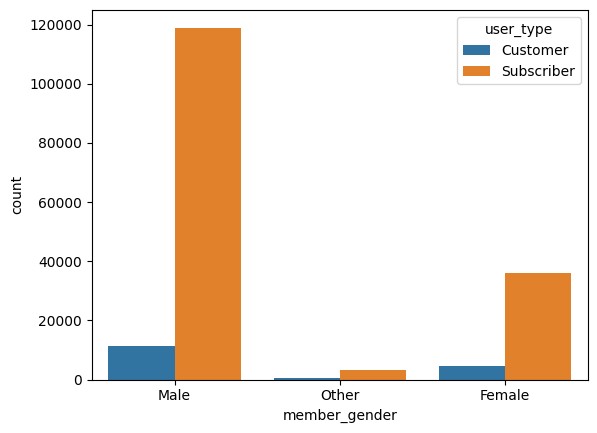

In [4]:
sb.countplot(data=df, x="member_gender", hue="user_type")

## (Relationship between Gender and average Duration time)

> Although the number is much larger, men are the sex with the lowest duration time. it was a surprise.

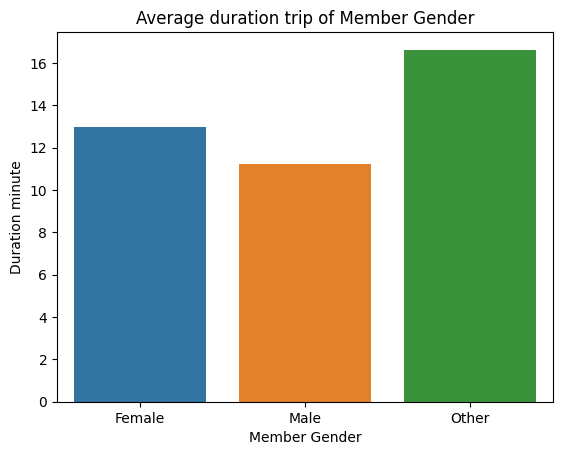

In [5]:
member_gender_duration_min = df[['member_gender','duration_min']].groupby(['member_gender'],as_index= False).mean().round(2)

sb.barplot(x='member_gender', y='duration_min', data=member_gender_duration_min)
plt.title("Average duration trip of Member Gender")
plt.xlabel("Member Gender")
plt.ylabel("Duration minute")
plt.show()

## (Duration time average of trips in a week)

>  It's not much of a surprise that the duration time of weekends is more than weekdays.

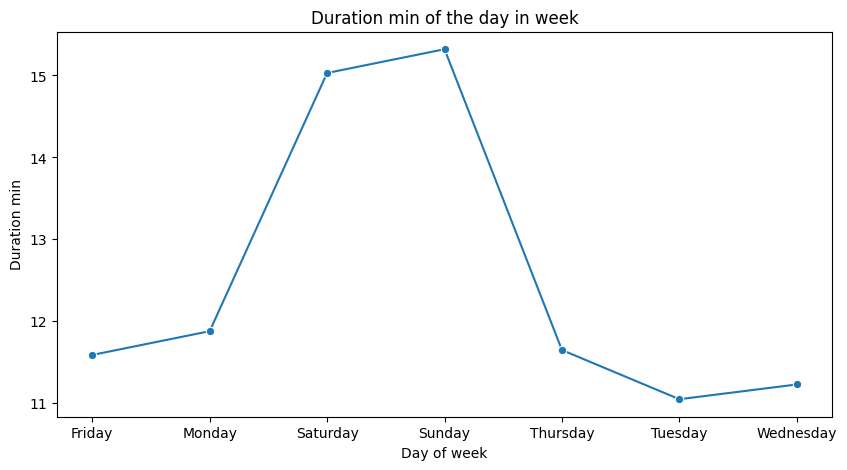

In [6]:
duration_min_day_week = df[['day_of_week','duration_min']].groupby(['day_of_week'],as_index= False).mean().round(2)
plt.figure(figsize=[10,5])
sb.lineplot(data=duration_min_day_week, x='day_of_week', y='duration_min',marker='o')
plt.ylabel('Duration min')
plt.xlabel('Day of week')
plt.title('Duration min of the day in week')
plt.show()

## (Trips in the week)

> It's a bit surprising that Thursday is the day with the highest number of trips

Text(0.5, 1.0, 'Trips in the Week')

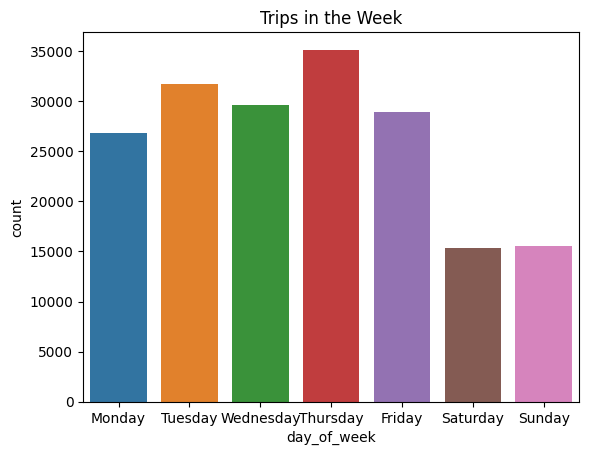

In [10]:
day_dict = df['day_of_week'].value_counts().to_dict()
weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


sb.countplot(data = df, x = 'day_of_week', order=weekday)
plt.title('Trips in the Week')

## (Start hour and day of week)

> The starting times for weekday trips are roughly the same. And the same goes for 2 weekends

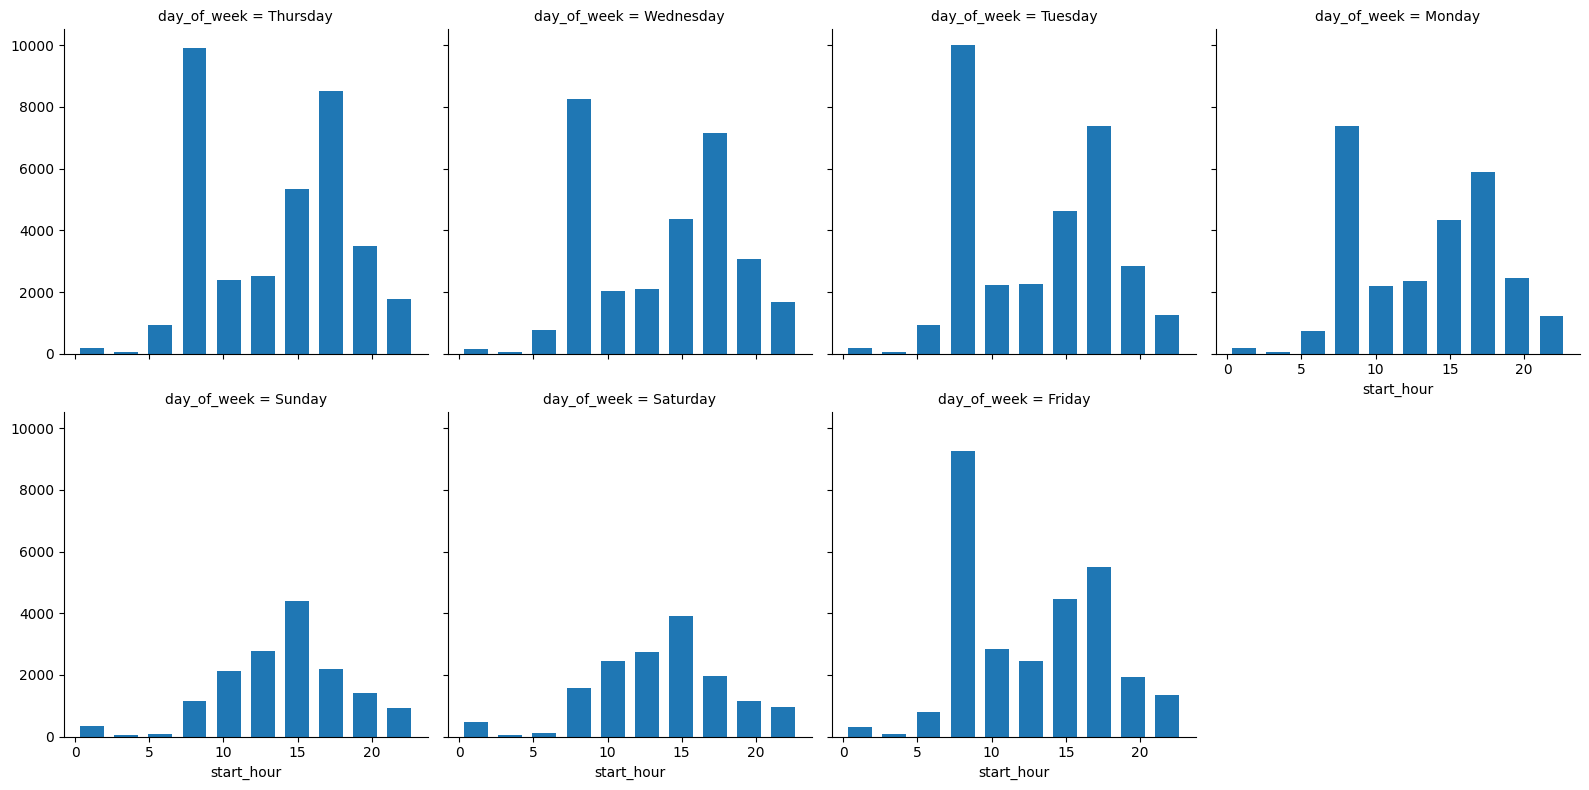

In [11]:
g = sb.FacetGrid(data = df, col = 'day_of_week', height=4, aspect=1, col_wrap=4)
g.map(plt.hist, 'start_hour', rwidth = 0.7)

## (Average trip duration between Customer and Subcriber)

> We can see that the average weekly Customer trip time is much higher Subscriber. While the average daily Subscriber is around 10. The Customer's fluctuates with a large amplitude of 20-30 minutes on average per day

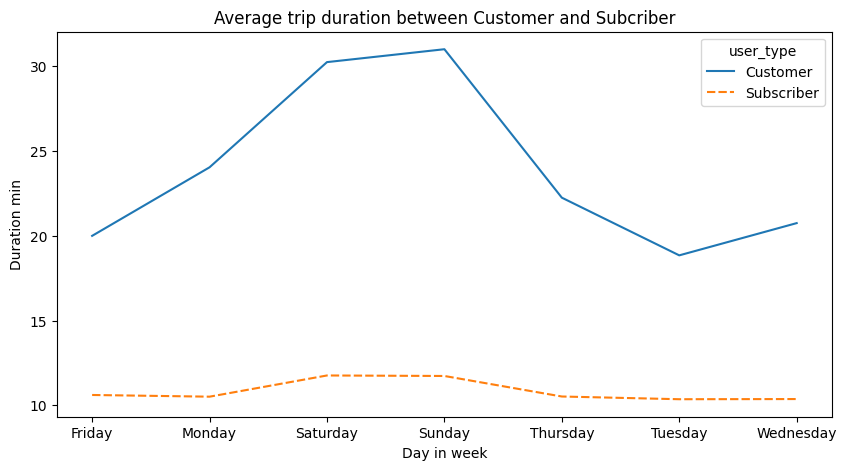

In [12]:
# Caculate average
duration_min_avr = df.groupby(['user_type','day_of_week']).duration_min.mean().round(2)

# Reset the index, or a level of it.
duration_min_avr = duration_min_avr.reset_index(drop=False)

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sb.lineplot(data = duration_min_avr, x='day_of_week', y='duration_min', hue='user_type', style='user_type')
plt.title("Average trip duration between Customer and Subcriber")
plt.xlabel('Day in week');
plt.ylabel('Duration min');